## NLP LAB-12 Building and Parsing Context Free Grammars

### 225229119

In [1]:
import nltk
nltk.download("punkt")
from nltk.tree import Tree
from nltk.tokenize import word_tokenize
from IPython.display import display
import nltk,re,pprint
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
import numpy as npt
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16 &')# create virtual display with size 1600x1200 and 16 bit color. Co
os.environ['DISPLAY']=':1.0'# tell X clients to use our virtual DISPLAY :1.0.
%matplotlib inline
### INSTALL GHOSTSCRIPT (Required to display NLTK trees)
!apt install ghostscript python3-tk

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\1mscdsa38\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'apt' is not recognized as an internal or external command,
operable program or batch file.


### EXERCISE-1: Build Grammar and Parser

In [2]:
rammar_1 = nltk.CFG.fromstring("""
S -> NP VP | NP VP
NP -> N | Det N | PRO | N N
VP -> V NP CP | VP ADVP | V NP
ADVP -> ADV ADV
CP -> COMP S
N -> 'Lisa' | 'brother' | 'peanut' | 'butter'
V -> 'told' | 'liked'
COMP -> 'that'
Det -> 'her'
PRO -> 'she'
ADV -> 'very' | 'much'
S -> NP VP
NP -> NP CONJ NP | N | NP PP | Det N | N | Det N
VP -> VP PP | VP CONJ VP | V | V
PP -> P NP | P NP
N -> 'Homer' | 'friends' | 'work' | 'bar'
V -> 'drank' | 'sang'
CONJ -> 'and' | 'and'
Det -> 'his' | 'the'
P -> 'from' | 'in'
S -> NP VP
NP -> NP CONJ NP | N | N
VP -> V ADJP
ADJP -> ADJP CONJ ADJP | ADJ | ADV ADJ
N -> 'Homer' | 'Marge'
V -> 'are'
CONJ -> 'and' | 'but'
ADJ -> 'poor' | 'happy'
ADV -> 'very'
S -> NP VP | NP AUX VP
NP -> PRO | NP CP | Det N | PRO | PRO | PRO | N |Det N
VP -> V NP PP | V NP NP
CP -> COMP S
PP -> P NP
Det -> 'the' | 'his'
PRO -> 'he' | 'I' | 'him'
N -> 'book' | 't' | 'sister'
V -> 'gave' | 'given'
COMP -> 'that'
AUX -> 'had'
P -> 'to'
S -> NP VP
NP -> PRO | Det N | Det N
VP -> V NP PP
PP -> P NP
Det -> 'the' | 'his'
PRO -> 'he'
N -> 'book' | 'sister'
V -> 'gave'
P -> 'to'
S -> NP VP
NP -> Det ADJ N | Det ADJ ADJ N | N
VP -> V NP|VP PP
PP -> P NP
Det -> 'the' | 'the'
ADJ -> 'big' | 'tiny' | 'nerdy'
N -> 'bully' | 'kid' | 'school'
V -> 'punched'
P -> 'after'
""")

#### 1.Using NLTK's nltk.CFG.fromstring() method, build a CFG named grammar1. The grammar should cover all of the sentences below and their tree structure as presented on this page. The grammar's start symbol should be 'S': make sure that an S rule (ex. S -> NP VP) is the very top rule in your list of rules. (s6)the big bully punched the tiny nerdy kid after school.

In [3]:
s6_grammar1 = nltk.CFG.fromstring("""
S -> NP VP
NP -> Det ADJ N | Det ADJ ADJ N | N
VP -> V NP|VP PP
PP -> P NP
Det -> 'the' | 'the'
ADJ -> 'big' | 'tiny' | 'nerdy'
N -> 'bully' | 'kid' | 'school'
V -> 'punched'
P -> 'after'
""")

In [4]:
sent1 = word_tokenize("the big bully punched the tiny nerdy kid after school")
parser = nltk.ChartParser(s6_grammar1)
for tree in parser.parse(sent1):
 print(tree)

(S
  (NP (Det the) (ADJ big) (N bully))
  (VP
    (VP (V punched) (NP (Det the) (ADJ tiny) (ADJ nerdy) (N kid)))
    (PP (P after) (NP (N school)))))


In [6]:
!pip install svgling

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import nltk

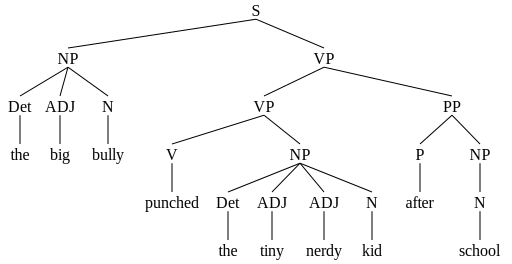

In [3]:
np1 =nltk.Tree.fromstring('(S(NP (Det the) (ADJ big) (N bully))(VP(VP (V punched) (NP (Det the) (ADJ tiny) (ADJ nerdy) (N kid)))(PP (P after) (NP (N school)))))')
display(np1)

(s7)he gave the book to his sister

In [4]:
s7_grammar1 = nltk.CFG.fromstring("""
S -> NP VP
NP -> PRO | Det N | Det N
VP -> V NP PP
PP -> P NP
Det -> 'the' | 'his'
PRO -> 'he'
N -> 'book' | 'sister'
V -> 'gave'
P -> 'to'
""")

In [6]:
from nltk.tokenize import word_tokenize

In [7]:
sent2 = word_tokenize("he gave the book to his sister")
parser = nltk.ChartParser(s7_grammar1)
for i in parser.parse(sent2):
  print(i)

(S
  (NP (PRO he))
  (VP
    (V gave)
    (NP (Det the) (N book))
    (PP (P to) (NP (Det his) (N sister)))))


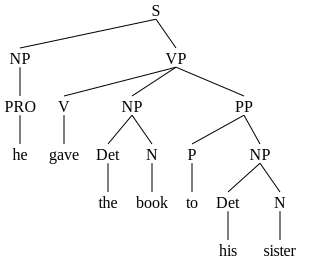

In [8]:
np2 =nltk.Tree.fromstring('(S(NP (PRO he))(VP(V gave)(NP (Det the) (N book))(PP (P to) (NP (Det his) (N sister)))))')
display(np2)

(s8)he gave the book that I had given him t to his sister

In [9]:
s8_grammar1 = nltk.CFG.fromstring("""
S -> NP VP | NP AUX VP
NP -> PRO | NP CP | Det N | PRO | PRO | PRO | N |Det N
VP -> V NP PP | V NP NP
CP -> COMP S
PP -> P NP
Det -> 'the' | 'his'
PRO -> 'he' | 'I' | 'him'
N -> 'book' | 't' | 'sister'
V -> 'gave' | 'given'
COMP -> 'that'
AUX -> 'had'
P -> 'to'
""")

In [10]:
sent3 = word_tokenize("he gave the book that I had given him t to his sister")
parser = nltk.ChartParser(s8_grammar1)
for i in parser.parse(sent3):
  print(i)

(S
  (NP (PRO he))
  (VP
    (V gave)
    (NP
      (NP (Det the) (N book))
      (CP
        (COMP that)
        (S
          (NP (PRO I))
          (AUX had)
          (VP (V given) (NP (PRO him)) (NP (N t))))))
    (PP (P to) (NP (Det his) (N sister)))))


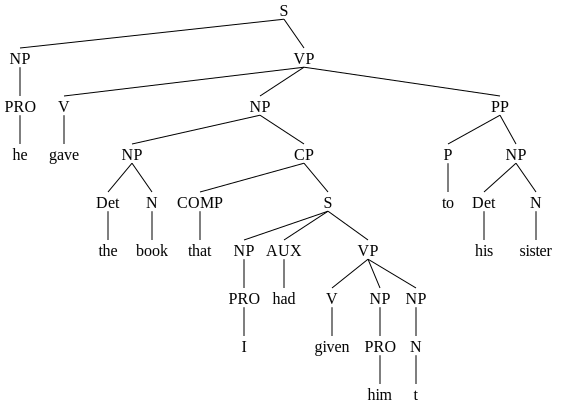

In [11]:
np3 =nltk.Tree.fromstring('(S(NP (PRO he))(VP(V gave)(NP(NP (Det the) (N book))(CP(COMP that)(S(NP (PRO I))(AUX had)(VP (V given) (NP (PRO him)) (NP (N t))))))(PP (P to) (NP (Det his) (N sister)))))')
display(np3)

(s9)Homer and Marge are poor but very happy

In [12]:
s9_grammar1 = nltk.CFG.fromstring("""
S -> NP VP
NP -> NP CONJ NP | N | N
VP -> V ADJP
ADJP -> ADJP CONJ ADJP | ADJ | ADV ADJ
N -> 'Homer' | 'Marge'
V -> 'are'
CONJ -> 'and' | 'but'
ADJ -> 'poor' | 'happy'
ADV -> 'very'
""")

In [13]:
sent4 = word_tokenize("Homer and Marge are poor but very happy")
parser = nltk.ChartParser(s9_grammar1)
for i in parser.parse(sent4):
  print(i)

(S
  (NP (NP (N Homer)) (CONJ and) (NP (N Marge)))
  (VP
    (V are)
    (ADJP (ADJP (ADJ poor)) (CONJ but) (ADJP (ADV very) (ADJ happy)))))


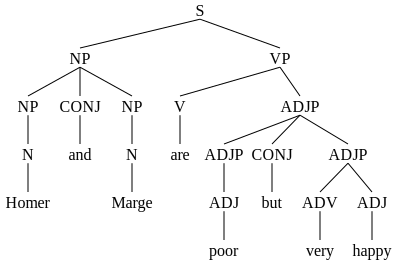

In [14]:
np4 =nltk.Tree.fromstring('(S(NP (NP (N Homer)) (CONJ and) (NP (N Marge)))(VP(V are)(ADJP (ADJP (ADJ poor)) (CONJ but) (ADJP (ADV very) (ADJ happy)))))')
display(np4)

(s10)Homer and his friends from work drank and sang in the bar

In [15]:
s10_grammar1 = nltk.CFG.fromstring("""
S -> NP VP
NP -> NP CONJ NP | N | NP PP | Det N | N | Det N
VP -> VP PP | VP CONJ VP | V | V
PP -> P NP | P NP
N -> 'Homer' | 'friends' | 'work' | 'bar'
V -> 'drank' | 'sang'
CONJ -> 'and' | 'and'
Det -> 'his' | 'the'
P -> 'from' | 'in'
""")

In [16]:
sent5 = word_tokenize("Homer and his friends from work drank and sang in the bar")
parser = nltk.ChartParser(s10_grammar1)
for i in parser.parse(sent5):
  print(i)

(S
  (NP
    (NP (NP (N Homer)) (CONJ and) (NP (Det his) (N friends)))
    (PP (P from) (NP (N work))))
  (VP
    (VP (VP (V drank)) (CONJ and) (VP (V sang)))
    (PP (P in) (NP (Det the) (N bar)))))
(S
  (NP
    (NP (N Homer))
    (CONJ and)
    (NP (NP (Det his) (N friends)) (PP (P from) (NP (N work)))))
  (VP
    (VP (VP (V drank)) (CONJ and) (VP (V sang)))
    (PP (P in) (NP (Det the) (N bar)))))
(S
  (NP
    (NP (NP (N Homer)) (CONJ and) (NP (Det his) (N friends)))
    (PP (P from) (NP (N work))))
  (VP
    (VP (V drank))
    (CONJ and)
    (VP (VP (V sang)) (PP (P in) (NP (Det the) (N bar))))))
(S
  (NP
    (NP (N Homer))
    (CONJ and)
    (NP (NP (Det his) (N friends)) (PP (P from) (NP (N work)))))
  (VP
    (VP (V drank))
    (CONJ and)
    (VP (VP (V sang)) (PP (P in) (NP (Det the) (N bar))))))


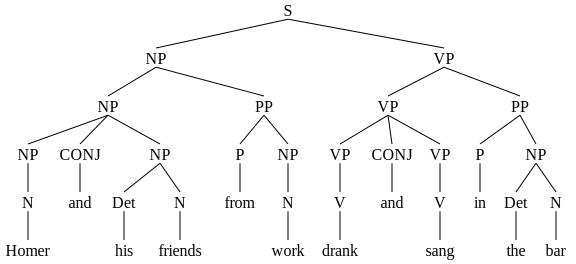

In [17]:
np5 =nltk.Tree.fromstring('(S(NP(NP (NP (N Homer)) (CONJ and) (NP (Det his) (N friends)))(PP (P from) (NP (N work))))(VP(VP (VP (V drank)) (CONJ and) (VP (V sang)))(PP (P in) (NP (Det the) (N bar)))))')
display(np5)

(s11)Lisa told her brother that she liked peanut butter very much

In [18]:
s11_grammar1 = nltk.CFG.fromstring("""
S -> NP VP | NP VP
NP -> N | Det N | PRO | N N
VP -> V NP CP | VP ADVP | V NP
ADVP -> ADV ADV
CP -> COMP S
N -> 'Lisa' | 'brother' | 'peanut' | 'butter'
V -> 'told' | 'liked'
COMP -> 'that'
Det -> 'her'
PRO -> 'she'
ADV -> 'very' | 'much'
""")

In [19]:
sent6 = word_tokenize("Lisa told her brother that she liked peanut butter very much")
parser = nltk.ChartParser(s11_grammar1)
for i in parser.parse(sent6):
  print(i)

(S
  (NP (N Lisa))
  (VP
    (VP
      (V told)
      (NP (Det her) (N brother))
      (CP
        (COMP that)
        (S (NP (PRO she)) (VP (V liked) (NP (N peanut) (N butter))))))
    (ADVP (ADV very) (ADV much))))
(S
  (NP (N Lisa))
  (VP
    (V told)
    (NP (Det her) (N brother))
    (CP
      (COMP that)
      (S
        (NP (PRO she))
        (VP
          (VP (V liked) (NP (N peanut) (N butter)))
          (ADVP (ADV very) (ADV much)))))))


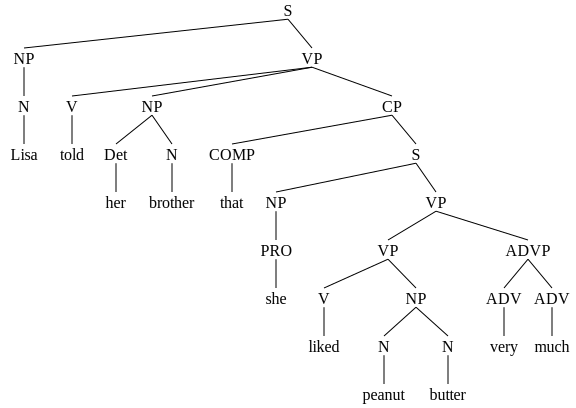

In [20]:
np6 =nltk.Tree.fromstring('(S(NP (N Lisa))(VP(V told)(NP (Det her) (N brother))(CP(COMP that)(S(NP (PRO she))(VP(VP (V liked) (NP (N peanut) (N butter)))(ADVP (ADV very) (ADV much)))))))')
display(np6)

#### 2.Once a grammar is built, you can print it. Also, you can extract a set of production rules with the .productions() method. Unlike the .productions() method called on a Tree object, the resulting list should be duplicate-free. As before, each rule in the list is a production rule type. A rule has a left-hand side node (the parent node), which you can getto using the .lhs() method; the actual string label for the node can be accessed by calling .symbol() on the node object.

In [21]:
grammer3 = nltk.CFG.fromstring("""
S -> NP VP
NP -> N
VP -> V
N -> 'Homer'
V -> 'sleeps'
""")

In [22]:
print(grammer3)

Grammar with 5 productions (start state = S)
    S -> NP VP
    NP -> N
    VP -> V
    N -> 'Homer'
    V -> 'sleeps'


In [23]:
grammer3.productions()

[S -> NP VP, NP -> N, VP -> V, N -> 'Homer', V -> 'sleeps']

In [24]:
last_rule = grammer3.productions()[-1]
last_rule

V -> 'sleeps'

In [25]:
last_rule.is_lexical()

True

In [26]:
last_rule.lhs()

V

In [27]:
last_rule.lhs().symbol()

'V'

#### 3.Explore the rules and answer the following questions.

In [28]:
Grammar_all = nltk.CFG.fromstring("""
S -> NP VP | NP AUX VP
NP -> Det ADJ N | N | PRO | Det N | PRO | NP CP | PRO | NP CONJ | NP PP | N N
VP -> V NP | VP PP | V NP PP | V NP | V ADJP | VP PP | VP CONJ | V NP CP | VP ADVP
CP -> COMP S
PP -> P NP
Det -> 'the' | 'his' | 'her'
ADJ -> 'big' | 'tiny' | 'nerdy' | 'poor' | 'happy'
ADV -> 'very' | 'much'
PRO -> 'he' | 'I' | 'him' | 'she'
ADJP -> ADJP CONJ | ADJ
ADVP -> ADV
N -> 'bully' | 'kid' | 'school' | 'book' | 'sister' | 't' | 'Homer' | 'Marge'| 'friends' | 'work' | 'bar' | 'Lisa' | 'brother' | 'peanut' | 'butter'
V -> 'punched' | 'gave' | 'given' | 'are' | 'drank' | 'sang' | 'told' | 'liked'
CONJ -> 'and' | 'but'
COMP -> 'that'
AUX -> 'had'
P -> 'after' | 'to' | 'from' | 'in'
""")

#### a. What is the start state of your grammar?

In [29]:
Grammar_all.productions()[0].lhs()

S

#### b. How many CF rules are in your grammar?

In [30]:
len(Grammar_all.productions())

71

#### c. How many of them are lexical?

In [31]:
n=0
for x in Grammar_all.productions():
    if x.is_lexical():
        n = n+1
print("How many of them are lexical? ",n)

How many of them are lexical?  45


#### d. How many VP rules are there? That is, how many rules have 'VP' on the left-hand side of the rule? That is, how many rules are of the VP -> ... form?

In [32]:
n=0
for x in Grammar_all.productions():
    if x.lhs().symbol() == 'VP':
        n = n+1
n

9

#### e. How many V rules are there? That is, how many rules have 'V' on the left-hand side of the fule? That is, how many rules are of the V -> ... form?

In [33]:
n=0
for x in Grammar_all.productions():
    if x.lhs().symbol() == 'V':
        n = n+1
n

8

#### 4.Using grammar1, build a chart parser.

In [34]:
sent = word_tokenize("Lisa told her brother that she liked peanut butter very much")
parser = nltk.ChartParser(Grammar_all)
for i in parser.parse(sent):
    print(i)

(S
  (NP (N Lisa))
  (VP
    (V told)
    (NP (Det her) (N brother))
    (CP
      (COMP that)
      (S
        (NP (PRO she))
        (VP
          (VP
            (VP (V liked) (NP (N peanut) (N butter)))
            (ADVP (ADV very)))
          (ADVP (ADV much)))))))
(S
  (NP (N Lisa))
  (VP
    (V told)
    (NP
      (NP (Det her) (N brother))
      (CP
        (COMP that)
        (S
          (NP (PRO she))
          (VP
            (VP
              (VP (V liked) (NP (N peanut) (N butter)))
              (ADVP (ADV very)))
            (ADVP (ADV much))))))))
(S
  (NP (N Lisa))
  (VP
    (VP
      (VP
        (V told)
        (NP (Det her) (N brother))
        (CP
          (COMP that)
          (S
            (NP (PRO she))
            (VP (V liked) (NP (N peanut) (N butter))))))
      (ADVP (ADV very)))
    (ADVP (ADV much))))
(S
  (NP (N Lisa))
  (VP
    (VP
      (VP
        (V told)
        (NP
          (NP (Det her) (N brother))
          (CP
            (COMP that)
       

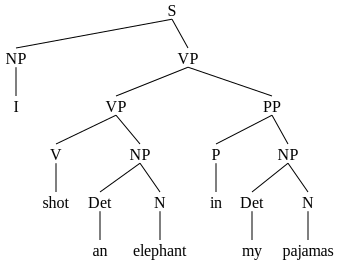

In [35]:
q41 =nltk.Tree.fromstring('(S (NP I) (VP (VP (V shot) (NP (Det an) (N elephant))) (PP (P in) (NP (Det my) (N pajamas)))))')
display(q41)

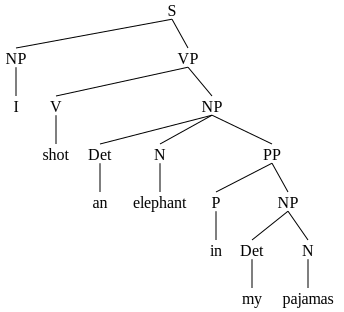

In [36]:
q42 =nltk.Tree.fromstring('(S (NP I) (VP (V shot) (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))')
display(q42)

#### 5.Using the parser, parse the sentences s6 -- s11. If your grammar1 is built correctly to cover all of the sentences, the parser should successfully parse all of them.

In [37]:
!pip install simple-colors
from simple_colors import *

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [38]:
print(black("(s6):the big bully punched the tiny nerdy kid after school","bold"))
print("\n")
sent6 = word_tokenize("the big bully punched the tiny nerdy kid after school")
parser = nltk.ChartParser(Grammar_all)
for i in parser.parse(sent6):
    print(i)
print("------------------------------------------------------------------------------")
print("\n")
print(black("(s7):he gave the book to his sister","bold"))
print("\n")
sent7 = word_tokenize("he gave the book to his sister")
parser = nltk.ChartParser(Grammar_all)
for i in parser.parse(sent7):
    print(i)
print("------------------------------------------------------------------------------")
print("\n")
print(black("(s8):he gave the book that I had given him t to his sister","bold"))
print("\n")
sent8 = word_tokenize("he gave the book that I had given him t to his sister")
parser = nltk.ChartParser(Grammar_all)
for i in parser.parse(sent8):
    print(i)
print("------------------------------------------------------------------------------")
print("\n")
print(black("(s9):Homer and Marge are poor but very happy","bold"))
print("\n")
sent9 = word_tokenize("Homer and Marge are poor but very happy")
parser = nltk.ChartParser(Grammar_all)
for i in parser.parse(sent9):
    print(i)
print("------------------------------------------------------------------------------")
print("\n")
print(black("(s10):Homer and his friends from work drank and sang in the bar","bold"))
print("\n")
sent10 = word_tokenize("Homer and his friends from work drank and sang in the bar")
parser = nltk.ChartParser(Grammar_all)
for i in parser.parse(sent10):
    print(i)
print("------------------------------------------------------------------------------")
print("\n")
print(black("(s11):Lisa told her brother that she liked peanut butter very much","bold"))
print("\n")
sent11 = word_tokenize("Lisa told her brother that she liked peanut butter very much")
parser = nltk.ChartParser(Grammar_all)
for i in parser.parse(sent11):
    print(i)

(s6):the big bully punched the tiny nerdy kid after school


------------------------------------------------------------------------------


(s7):he gave the book to his sister


(S
  (NP (PRO he))
  (VP
    (VP (V gave) (NP (Det the) (N book)))
    (PP (P to) (NP (Det his) (N sister)))))
(S
  (NP (PRO he))
  (VP
    (V gave)
    (NP (Det the) (N book))
    (PP (P to) (NP (Det his) (N sister)))))
(S
  (NP (PRO he))
  (VP
    (V gave)
    (NP
      (NP (Det the) (N book))
      (PP (P to) (NP (Det his) (N sister))))))
------------------------------------------------------------------------------


(s8):he gave the book that I had given him t to his sister


------------------------------------------------------------------------------


(s9):Homer and Marge are poor but very happy


------------------------------------------------------------------------------


(s10):Homer and his friends from work drank and sang in the bar


-----------------------------------------------------------